In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import haversine
import keras

In [4]:
df = pd.read_csv("C:/Users/bhaumik/Downloads/Delivery-time/Delivery time/deliverytime.txt")

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [10]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

#  Calculating Distance Between  2 Latitudes and Longitudes

In [19]:
from haversine import haversine, Unit

# Define a function to calculate distances using Haversine formula
def calculate_distance(row):
    point1 = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    point2 = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return haversine(point1, point2, unit=Unit.KILOMETERS)
df['distance'] = df.apply(calculate_distance, axis=1)


In [20]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025153
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183558
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552760
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790412
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210147


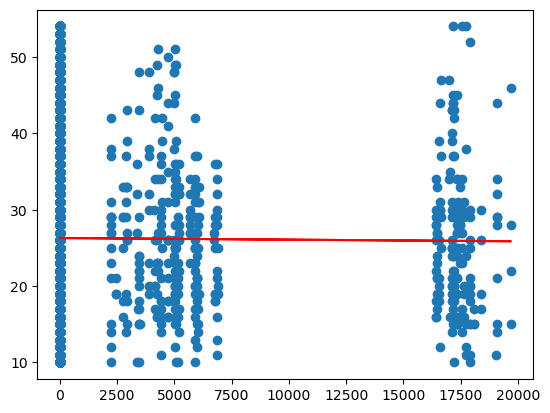

In [37]:
plt.scatter(df["distance"],df["Time_taken(min)"])
#calculate equation for trendline
z = np.polyfit(df["distance"],df["Time_taken(min)"],1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(df["distance"], p(df["distance"]),"-r")
plt.show()

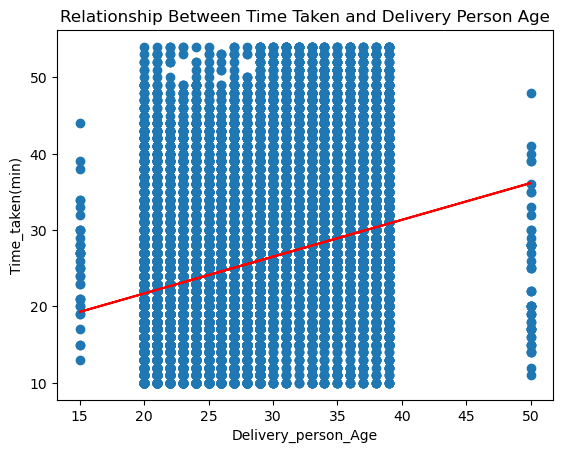

In [46]:
plt.scatter(df["Delivery_person_Age"],df["Time_taken(min)"])
#calculate equation for trendline
z = np.polyfit(df["Delivery_person_Age"],df["Time_taken(min)"],1)
p = np.poly1d(z)
plt.title("Relationship Between Time Taken and Delivery Person Age")
plt.xlabel("Delivery_person_Age")
plt.ylabel("Time_taken(min)")
#add trendline to plot
plt.plot(df["Delivery_person_Age"], p(df["Delivery_person_Age"]),"-r")
plt.show()

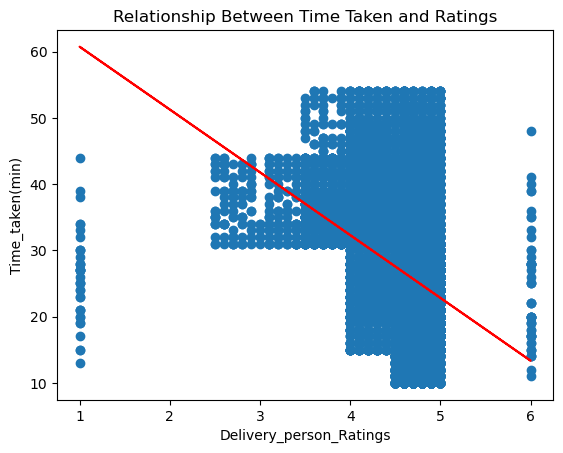

In [45]:
plt.scatter(df["Delivery_person_Ratings"],df["Time_taken(min)"])
#calculate equation for trendline
z = np.polyfit(df["Delivery_person_Ratings"],df["Time_taken(min)"],1)
p = np.poly1d(z)
plt.title("Relationship Between Time Taken and Ratings")
plt.xlabel("Delivery_person_Ratings")
plt.ylabel("Time_taken(min)")
#add trendline to plot
plt.plot(df["Delivery_person_Ratings"], p(df["Delivery_person_Ratings"]),"-r")
plt.show()

Segregating the Data


In [58]:
from sklearn.model_selection import train_test_split
x = np.array(df[["Delivery_person_Age", "Delivery_person_Ratings", "distance"]])
y = np.array(df[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=20)

Epoch 1/20
36474/36474 [==============================] - 84s 2ms/step - loss: 58.8067
Epoch 2/20
36474/36474 [==============================] - 84s 2ms/step - loss: 58.8503
Epoch 3/20
36474/36474 [==============================] - 86s 2ms/step - loss: 58.5496
Epoch 4/20
36474/36474 [==============================] - 85s 2ms/step - loss: 58.6811
Epoch 5/20
36474/36474 [==============================] - 85s 2ms/step - loss: 58.2247
Epoch 6/20
36474/36474 [==============================] - 90s 2ms/step - loss: 58.1313
Epoch 7/20
36474/36474 [==============================] - 85s 2ms/step - loss: 58.2954
Epoch 8/20
36474/36474 [==============================] - 86s 2ms/step - loss: 57.9718
Epoch 9/20
36474/36474 [==============================] - 92s 3ms/step - loss: 57.9318
Epoch 10/20
36474/36474 [==============================] - 89s 2ms/step - loss: 57.8797
Epoch 11/20
36474/36474 [==============================] - 89s 2ms/step - loss: 57.7390
Epoch 12/20
36474/36474 [================

In [64]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 29
Ratings of Previous Deliveries: 2.9
Total Distance: 6
1/1 [==============================] - 1s 611ms/step
Predicted Delivery Time in Minutes =  [[39.01214]]
